# Example Notebook

In [22]:
# example.ipynb

from chemoecology_tools.core import GCMSExperiment
from chemoecology_tools.analysis import calculate_enrichment_table, perform_nmds
from chemoecology_tools.visualization import plot_nmds

In [23]:
USER_PROVIDED_CHEMICAL_METADATA_PATH = "../example_data/user_provided_chemical_metadata.yaml"
ABUNDANCE_DATA_PATH = "../example_data/LBAL23_relative_abundance.csv"
USER_PROVIDED_SAMPLE_METADATA_PATH = "../example_data/LBAL23_metadata.csv"
ID_COLUMN = "Bee #"

In [24]:
# Load experimental data with metadata
experiment = GCMSExperiment.from_files(
    abundance_path=ABUNDANCE_DATA_PATH,
    metadata_path=USER_PROVIDED_SAMPLE_METADATA_PATH,
    id_col=ID_COLUMN,
    fetch_pubchem=True,
    filter_dict={
        "CHC File Located": ["NO", "Bleed"],
        "Quality": ["poor", "contaminated"],
        "Nest Code": ["E-JS-030", "E-JS-033", "E-JS-037", "E-KO-140", "E-KO-143"]
    },
    user_chemical_metadata=USER_PROVIDED_CHEMICAL_METADATA_PATH
)

In [25]:
print(experiment)

Unnamed experiment: 84 samples, 48 chemicals measured


In [26]:
# Filter and process data
filtered = experiment.filter_trace_compounds(threshold=0.005)
relative = filtered.calculate_relative_abundance()

In [27]:
filtered.metadata_df.head()

,Bee #,Nest Code,CHC File Located,All Nestmates?,Social Phenotype,Date,Reproductivity,Caste,Notes,Brood Notes,...,Ovariole Length,Oocyte Index,DF Width,DF Length (mm),Behavior Score,Behavior Score Subordinate Classifier,Behavioral Notes,Bead Assay,Dissection Type,CHC Notes
0,129,A-KO-053,yes,Yes,Solitary,6/26/23,Some_rep,Sol_rep,NaN,NaN,...,2.103,0.230623,0.531,3.237,No contact,NaN,pilot assay,Pentane,RNAlater ICE,NaN
1,135,A-KO-055,yes,Yes,Solitary,6/26/23,Some_rep,Sol_nr,NaN,"1 pupa collected, squished 2 pupa",...,3.148,0.307814,0.476,2.917,NaN,NaN,No assay,No assay,RNAlater ICE,NaN
2,137,F-KO-056,yes,Yes,Solitary,6/26/23,Some_rep,Sol_nr,NaN,Brood squished,...,2.279,0.237385,0.490,3.177,No contact,NaN,pilot assay,Pentane,RNAlater ICE,NaN
3,138,E-SW-001,yes,Yes,Solitary,6/26/23,Some_rep,Sol_rep,NaN,No brood,...,2.070,0.397101,0.479,3.480,NaN,NaN,No assay,No assay,RNAlater ICE,NaN
4,139,E-SW-002,yes,Yes,Solitary,6/26/23,No_rep,Sol_nr,NaN,No brood,...,2.133,0.157525,0.522,3.293,Pass,Neutral,"pilot assay, agitated with tapping and q tip",Mono alkenes,RNAlater ICE,NaN


In [28]:
import pandas as pd

meta_mask = filtered.metadata_df["Caste"].isin(["Sol_r", "Sol_nr"])
chem_mask = pd.Series([
    filtered.get_chemical_property(c, "class") == "Alkane"
    for c in filtered.chemical_cols
], index=filtered.chemical_cols)

In [29]:
filtered_exp = experiment.filter(
    metadata_mask=meta_mask,
    chemical_mask=chem_mask
)
print(filtered_exp)

Unnamed experiment: 11 samples, 9 chemicals measured


In [30]:
nmds_df = perform_nmds(relative)
nmds_df.head()

,NMDS1,NMDS2
0,-0.105151,0.001950
1,-0.148030,-0.043070
2,-0.205022,-0.040856
3,0.060996,0.137077
4,-0.125090,0.055377


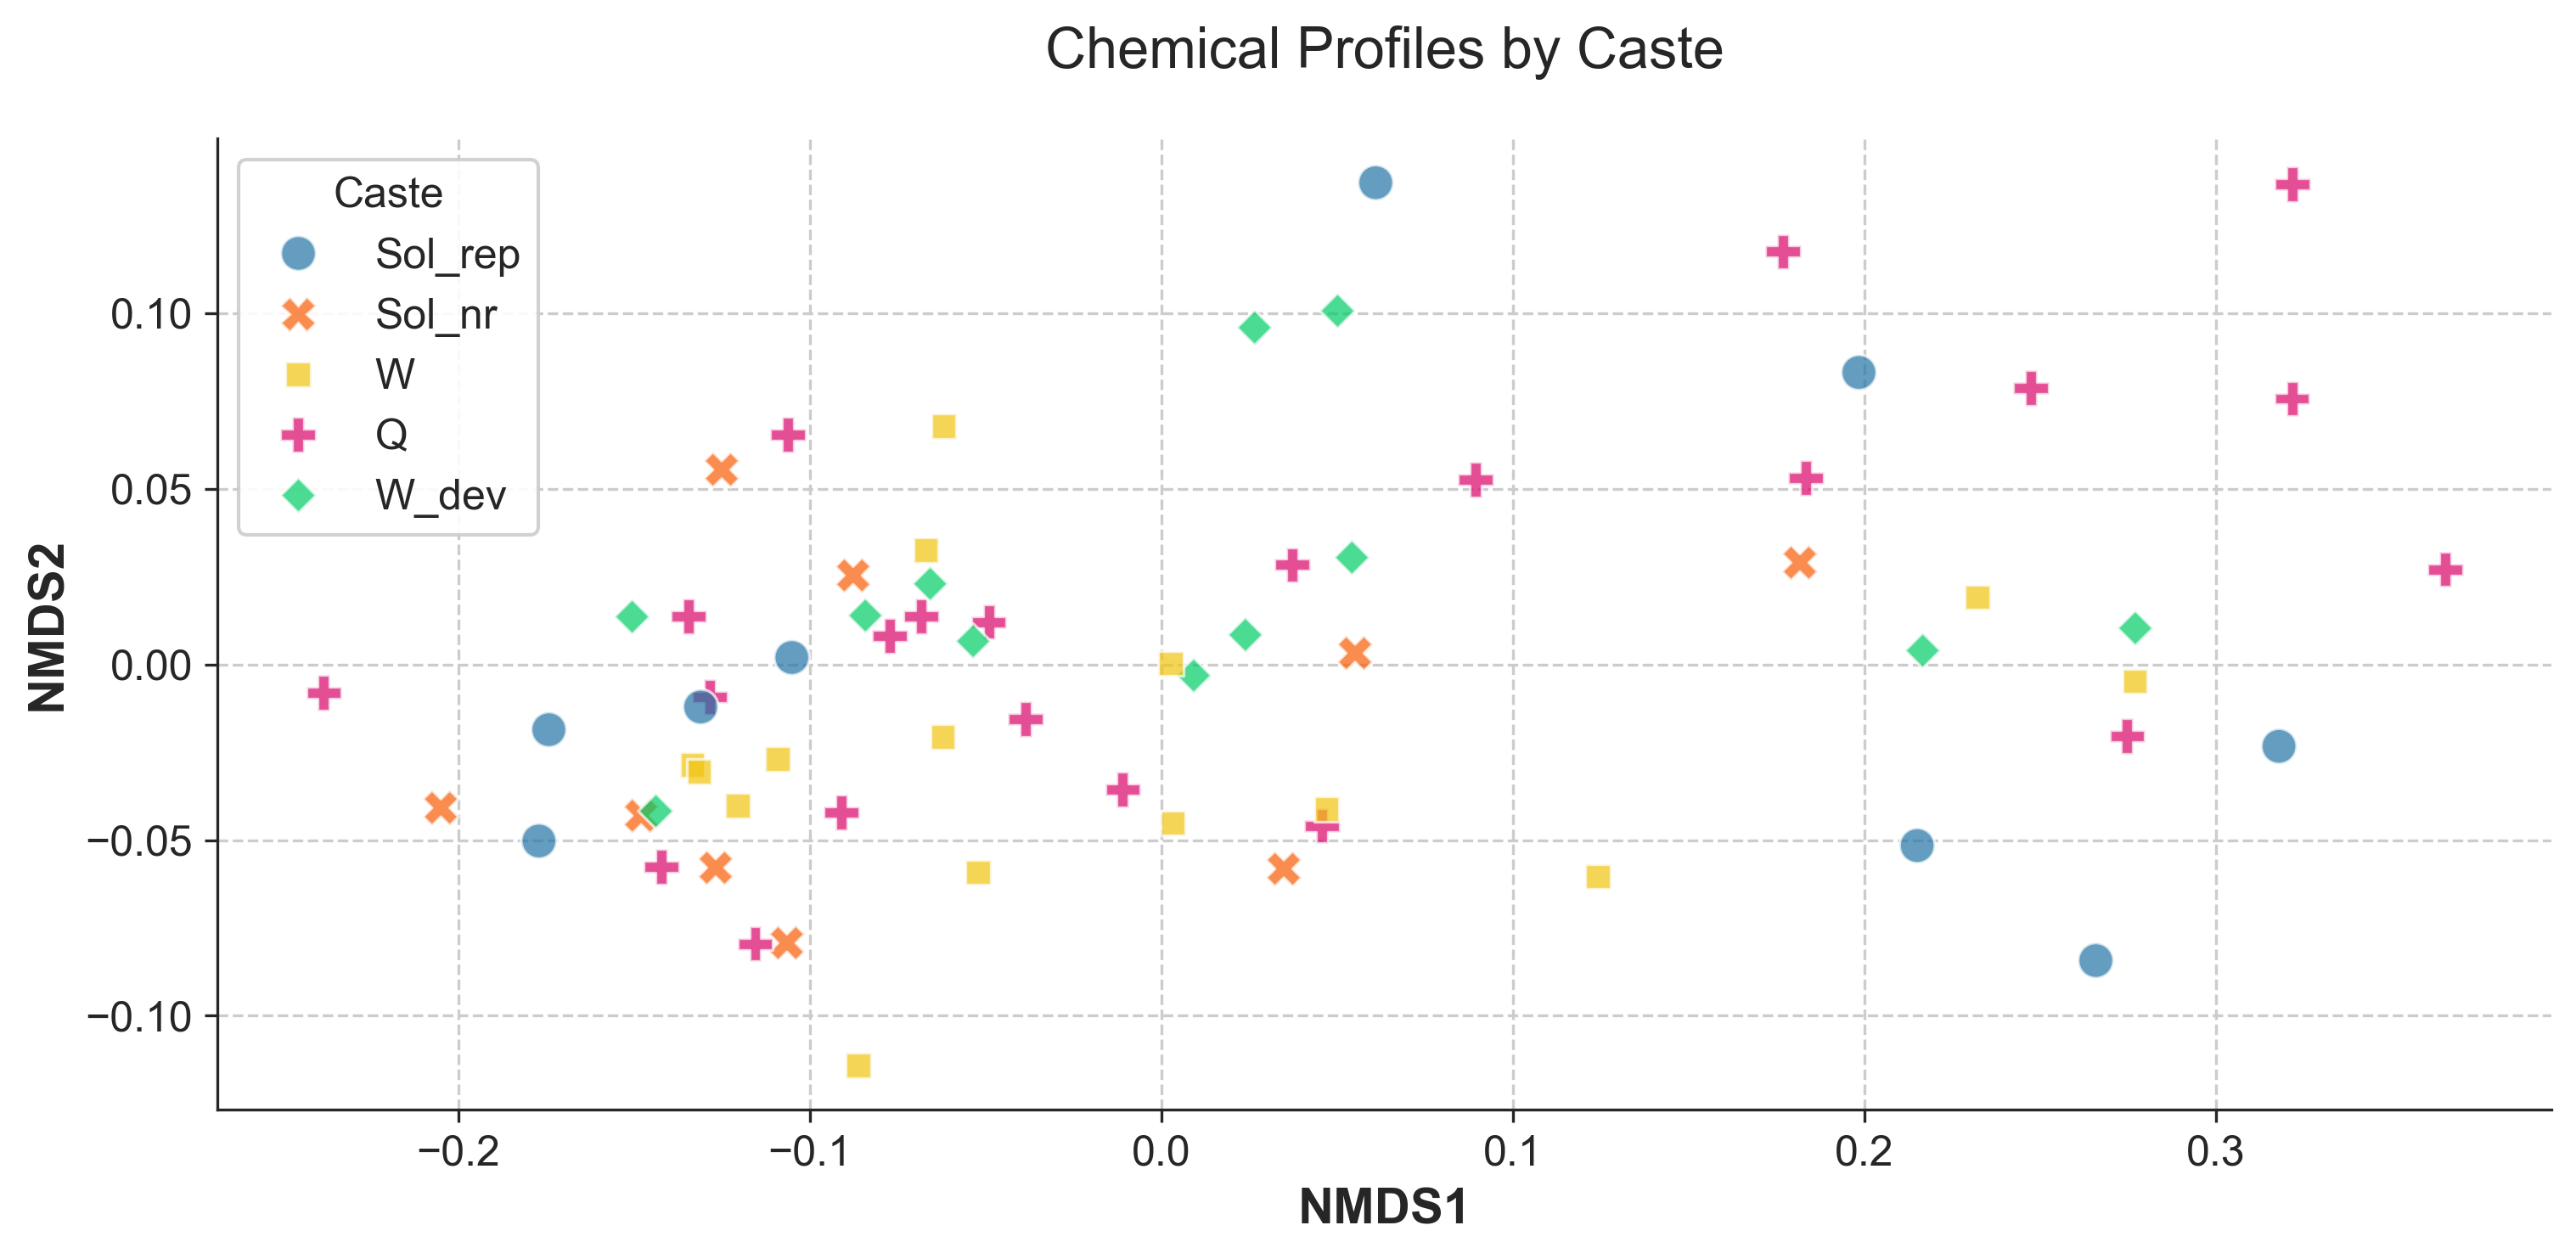

In [31]:
# Create plots with different groupings
# By caste
fig1 = plot_nmds(
    experiment=relative,
    nmds_coords=nmds_df,
    group_col="Caste",
    title="Chemical Profiles by Caste"
)

In [32]:
# Generate enrichment table
enrichment_table = calculate_enrichment_table(
    experiment=filtered,
    group_column='Caste',
    class_column='class',
    alpha=0.05
)

In [33]:
enrichment_table.head()

,Chemical Class,Compound,KW_pvalue,Group Bias,Sol_rep,Sol_nr,W,Q,W_dev
7,Aldehyde,Eicosanal,0.249934,,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00
2,Aldehyde,Octadecanal,0.390423,,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00
3,Alkane,Heneicosane,0.000008,"Sol_nr, Sol_rep",1.87 ± 0.58,1.72 ± 0.61,0.05 ± 0.00,0.09 ± 0.02,0.08 ± 0.02
26,Alkane,Heptacosane,0.043065,W_dev,2.29 ± 0.35,2.15 ± 0.33,2.06 ± 0.18,2.84 ± 0.26,3.35 ± 0.33
33,Alkane,Nonacosane,0.001116,"Q, Sol_nr, Sol_rep, W_dev",0.24 ± 0.04,0.22 ± 0.04,0.08 ± 0.01,0.25 ± 0.09,0.22 ± 0.03
